# Class Weight



## 0.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

### (2) 데이터 로딩

> 예제 데이터는 공정간 불량을 예측하는 데이터입니다.  
여기서는 class imbalance 에 대한 샘플링과 성능에만 초점을 맞추겠습니다.


In [3]:
path = "secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)

target = 'label'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

## 1.데이터 탐색

## 2.데이터 준비


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .4, random_state = 2021)

In [6]:
x_train.shape

(940, 52)

## 3.모델링

In [7]:
# 필요한 라이브러리, 함수들을 불러옵시다.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV, StratifiedKFold

### (1) 기본 모델링

* 로지스틱 회귀 + 데이터 그대로 이용

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print(confusion_matrix(y_val, pred))
print('-' * 55)
print(classification_report(y_val, pred))

[[587   1]
 [ 39   0]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       588
           1       0.00      0.00      0.00        39

    accuracy                           0.94       627
   macro avg       0.47      0.50      0.48       627
weighted avg       0.88      0.94      0.91       627



### (2) Class Weight 조정

#### 1) class_weight = 'balanced'

In [9]:
# class_weight = 'balanced'

model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
pred = model.predict(x_val)

print(confusion_matrix(y_val, pred))
print('-' * 55)
print(classification_report(y_val, pred))

[[367 221]
 [ 18  21]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       588
           1       0.09      0.54      0.15        39

    accuracy                           0.62       627
   macro avg       0.52      0.58      0.45       627
weighted avg       0.90      0.62      0.72       627



 * 반복실행 후 f1 score 확인하기

In [10]:
result = []

for i in range(50):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .4)
    model = LogisticRegression(class_weight='balanced')
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    result.append(f1_score(y_val, pred, pos_label=1))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


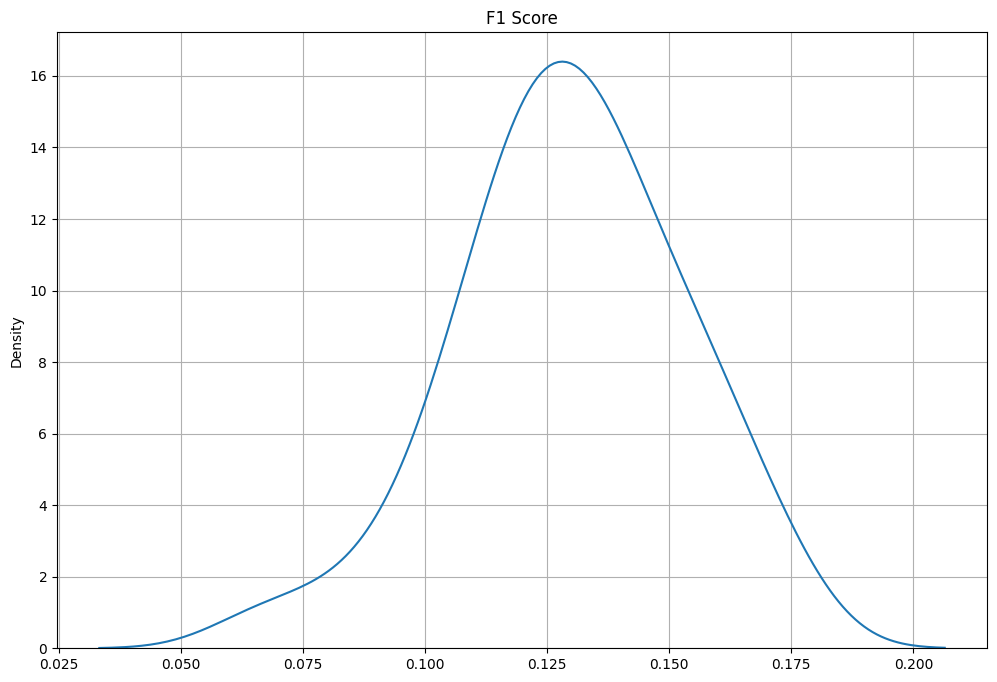

In [11]:
plt.figure(figsize=(12, 8))
sns.distplot(result, hist = False)
plt.title('F1 Score')
plt.grid()
plt.show()

#### 2) class_weight = 수동
* y_train 비율의 역수로

In [12]:
# 다수, 소수 클래스 비율 저장
c0 = (y_train.value_counts() / y_train.shape[0])[0]
c1 = (y_train.value_counts() / y_train.shape[0])[1]
c0, c1

(0.9393617021276596, 0.06063829787234042)

In [13]:
# class_weight = 수동

model = LogisticRegression(class_weight={0:c1, 1:c0})
model.fit(x_train, y_train)
pred = model.predict(x_val)

print(confusion_matrix(y_val, pred))
print('-' * 55)
print(classification_report(y_val, pred))

[[378 202]
 [ 30  17]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       580
           1       0.08      0.36      0.13        47

    accuracy                           0.63       627
   macro avg       0.50      0.51      0.45       627
weighted avg       0.86      0.63      0.72       627



#### 3) class_weight = GridSearch로 조절

In [14]:
# class_weight = 비율로 수동 조절하도록 파라미터 설정
weights = np.linspace(0.0,.99,100)

params = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
params

{'class_weight': [{0: 0.0, 1: 1.0},
  {0: 0.01, 1: 0.99},
  {0: 0.02, 1: 0.98},
  {0: 0.03, 1: 0.97},
  {0: 0.04, 1: 0.96},
  {0: 0.05, 1: 0.95},
  {0: 0.06, 1: 0.94},
  {0: 0.07, 1: 0.9299999999999999},
  {0: 0.08, 1: 0.92},
  {0: 0.09, 1: 0.91},
  {0: 0.1, 1: 0.9},
  {0: 0.11, 1: 0.89},
  {0: 0.12, 1: 0.88},
  {0: 0.13, 1: 0.87},
  {0: 0.14, 1: 0.86},
  {0: 0.15, 1: 0.85},
  {0: 0.16, 1: 0.84},
  {0: 0.17, 1: 0.83},
  {0: 0.18, 1: 0.8200000000000001},
  {0: 0.19, 1: 0.81},
  {0: 0.2, 1: 0.8},
  {0: 0.21, 1: 0.79},
  {0: 0.22, 1: 0.78},
  {0: 0.23, 1: 0.77},
  {0: 0.24, 1: 0.76},
  {0: 0.25, 1: 0.75},
  {0: 0.26, 1: 0.74},
  {0: 0.27, 1: 0.73},
  {0: 0.28, 1: 0.72},
  {0: 0.29, 1: 0.71},
  {0: 0.3, 1: 0.7},
  {0: 0.31, 1: 0.69},
  {0: 0.32, 1: 0.6799999999999999},
  {0: 0.33, 1: 0.6699999999999999},
  {0: 0.34, 1: 0.6599999999999999},
  {0: 0.35000000000000003, 1: 0.6499999999999999},
  {0: 0.36, 1: 0.64},
  {0: 0.37, 1: 0.63},
  {0: 0.38, 1: 0.62},
  {0: 0.39, 1: 0.61},
  {0: 0.4, 1:

In [15]:
# Grid Search : 그리드서치로 튜닝
# StratifiedKFold : 층화추출
model = GridSearchCV(LogisticRegression(), params
                    , cv= StratifiedKFold(5), scoring='f1')
model.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.01, 1: 0.99},
                                          {0: 0.02, 1: 0.98},
                                          {0: 0.03, 1: 0.97},
                                          {0: 0.04, 1: 0.96},
                                          {0: 0.05, 1: 0.95},
                                          {0: 0.06, 1: 0.94},
                                          {0: 0.07, 1: 0.9299999999999999},
                                          {0: 0.08, 1: 0.92},
                                          {0: 0.09, 1: 0.91}, {0: 0.1, 1: 0.9},
                                          {0: 0.11, 1: 0.89},
                                          {0: 0.12, 1: 0.88},
                                          {0: 0.13, 1: 0.87},
                                          {0: 0.14, 1: 0.86},
                                          {0: 0.15, 1: 0.85},
                                          {0: 0.16, 1: 0.84},
                                          {0: 0.17, 1: 0.83},
                                          {0: 0.18, 1: 0.8200000000000001},
                                          {0: 0.19, 1: 0.81}, {0: 0.2, 1: 0.8},
                                          {0: 0.21, 1: 0.79},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.23, 1: 0.77},
                                          {0: 0.24, 1: 0.76},
                                          {0: 0.25, 1: 0.75},
                                          {0: 0.26, 1: 0.74},
                                          {0: 0.27, 1: 0.73},
                                          {0: 0.28, 1: 0.72},
                                          {0: 0.29, 1: 0.71}, ...]},
             scoring='f1')

In [16]:
model.cv_results_

{'mean_fit_time': array([0.00600581, 0.01218162, 0.01215835, 0.01585622, 0.01462846,
        0.02197046, 0.01829162, 0.01691866, 0.01335087, 0.01602912,
        0.03661804, 0.02787685, 0.02350593, 0.01408687, 0.01601486,
        0.01397347, 0.01804047, 0.01462269, 0.01291099, 0.01412368,
        0.01256089, 0.01261692, 0.01312895, 0.01385131, 0.01373701,
        0.0147583 , 0.02989278, 0.01638517, 0.02279801, 0.02103343,
        0.02032814, 0.02100291, 0.01355195, 0.02837648, 0.01425171,
        0.01430736, 0.01459289, 0.01431122, 0.01920991, 0.0289854 ,
        0.022925  , 0.01330438, 0.0134078 , 0.01483698, 0.0166471 ,
        0.01744733, 0.01452579, 0.01405859, 0.01408935, 0.01440835,
        0.01368079, 0.01602187, 0.02619057, 0.01907711, 0.01867533,
        0.01738935, 0.01435118, 0.01370397, 0.01477089, 0.01344948,
        0.01403718, 0.01570644, 0.01483679, 0.0149138 , 0.0292551 ,
        0.02314429, 0.01438756, 0.02869887, 0.05474086, 0.01465955,
        0.01720538, 0.01648479,

{'class_weight': {0: 0.1, 1: 0.9}}


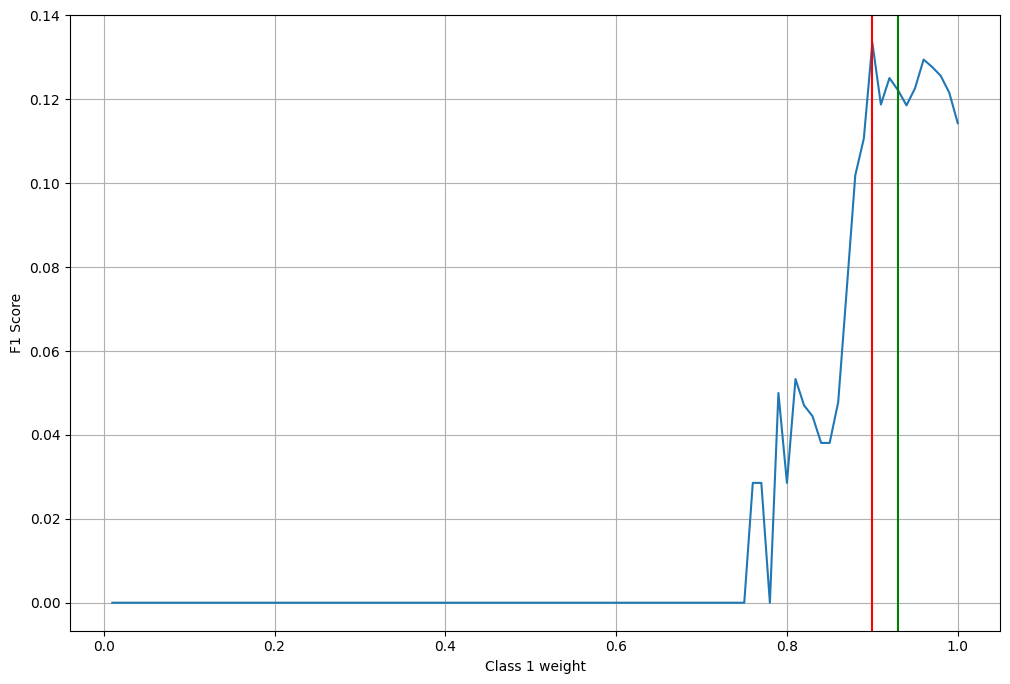

In [18]:
weight_1 = 1.0 - weights
f1 = model.cv_results_['mean_test_score']

print(model.best_params_)
plt.figure(figsize=(12, 8))
plt.plot(weight_1, f1)
plt.axvline(model.best_params_['class_weight'][1], color = 'r')
plt.axvline(0.93, color = 'g')
plt.ylabel('F1 Score')
plt.xlabel('Class 1 weight')
plt.grid()
plt.show()

## 4.실습 : 고객이탈 예측 - class weight 조정하기

### (1) 데이터 준비

* 데이터 로딩

In [19]:
path = "mobile_class_imbalance.csv"
data = pd.read_csv(path)

target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [20]:
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,145297,71,37,969515,478,4,1,avg,very_little,no,0
1,0,115956,0,11,899704,710,0,5,unsat,very_high,actively_looking_into_it,0
2,0,40683,212,15,844664,188,24,5,very_unsat,very_little,no,0
3,1,33043,0,81,539732,162,1,1,unsat,very_little,never_thought,0
4,1,50743,0,22,430005,318,16,5,unsat,very_high,actively_looking_into_it,0


In [21]:
y.value_counts() / y.shape[0]

CHURN
0    0.971286
1    0.028714
Name: count, dtype: float64

* 가변수화

In [22]:
cat = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']

for v in cat :
    dumm = pd.get_dummies(x[v], prefix=v, drop_first=True)
    x = pd.concat([x, dumm], axis=1)
    x.drop(v, axis=1, inplace = True)

* 데이터 분할

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 2000, random_state=2021)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 2000, random_state=2021)

### (2)기본모델링
> * 데이터셋을 그대로 모델링을 수행하시오.
* 알고리즘 : 로지스틱회귀, decision tree, SVM 등
* validate set으로 예측하고 평가(classification report, f1 score)해 봅시다.


In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print(confusion_matrix(y_val, pred))
print('-' * 55)
print(classification_report(y_val, pred))

[[1949    0]
 [  51    0]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1949
           1       0.00      0.00      0.00        51

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.95      0.97      0.96      2000



### (3) class weight : 값의 비율을 역으로 수동 지정
> * class_weight 값을 지정해서 모델링 해 봅시다.
* 알고리즘 : 비교를 위해서 기본모델링에 사용한 알고리즘 사용
* validate set으로 예측하고 평가(classification report, f1 score)해 봅시다.
* resampling 후 수행한 모델과 성능에 대해 비교해 봅시다.

In [25]:
# class_weight = 'balanced'

model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
pred = model.predict(x_val)

print(confusion_matrix(y_val, pred))
print('-' * 55)
print(classification_report(y_val, pred))

[[1260  689]
 [  21   30]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      1949
           1       0.04      0.59      0.08        51

    accuracy                           0.65      2000
   macro avg       0.51      0.62      0.43      2000
weighted avg       0.96      0.65      0.76      2000



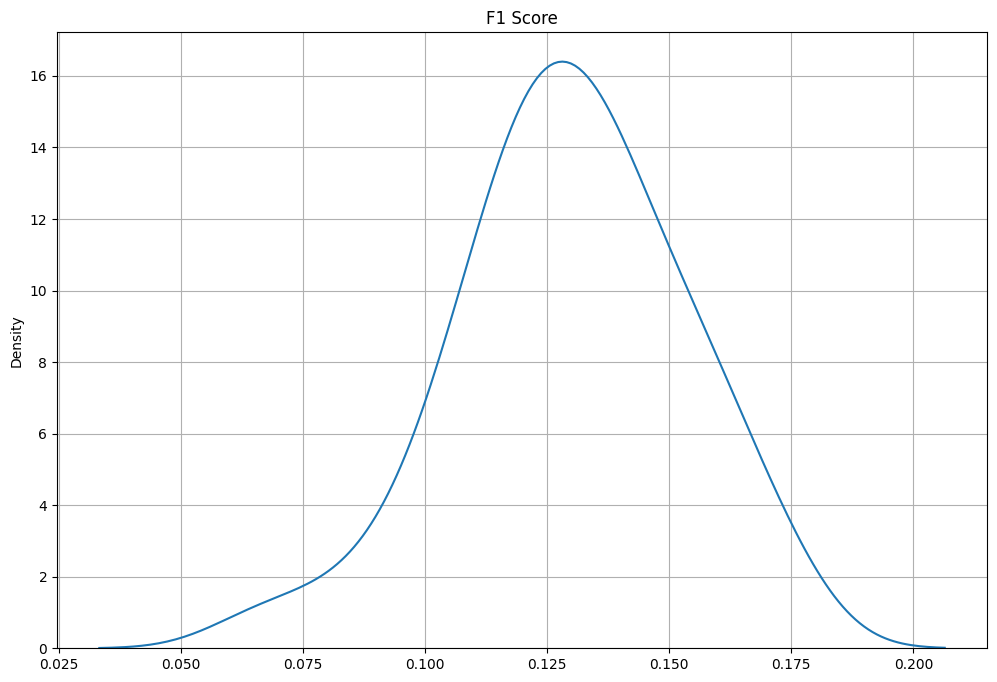

In [26]:
plt.figure(figsize=(12, 8))
sns.distplot(result, hist = False)
plt.title('F1 Score')
plt.grid()
plt.show()

### (4) class weight : Grid Search 튜닝
> * class_weight 값을 조금씩 조정하며 튜닝해 봅시다.
* 최적의 성능 지점과 (3)의 비율과 비교해 봅시다.

In [27]:
# class_weight = 비율로 수동 조절하도록 파라미터 설정
weights = np.linspace(0.0,.99,100)

params = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
params

{'class_weight': [{0: 0.0, 1: 1.0},
  {0: 0.01, 1: 0.99},
  {0: 0.02, 1: 0.98},
  {0: 0.03, 1: 0.97},
  {0: 0.04, 1: 0.96},
  {0: 0.05, 1: 0.95},
  {0: 0.06, 1: 0.94},
  {0: 0.07, 1: 0.9299999999999999},
  {0: 0.08, 1: 0.92},
  {0: 0.09, 1: 0.91},
  {0: 0.1, 1: 0.9},
  {0: 0.11, 1: 0.89},
  {0: 0.12, 1: 0.88},
  {0: 0.13, 1: 0.87},
  {0: 0.14, 1: 0.86},
  {0: 0.15, 1: 0.85},
  {0: 0.16, 1: 0.84},
  {0: 0.17, 1: 0.83},
  {0: 0.18, 1: 0.8200000000000001},
  {0: 0.19, 1: 0.81},
  {0: 0.2, 1: 0.8},
  {0: 0.21, 1: 0.79},
  {0: 0.22, 1: 0.78},
  {0: 0.23, 1: 0.77},
  {0: 0.24, 1: 0.76},
  {0: 0.25, 1: 0.75},
  {0: 0.26, 1: 0.74},
  {0: 0.27, 1: 0.73},
  {0: 0.28, 1: 0.72},
  {0: 0.29, 1: 0.71},
  {0: 0.3, 1: 0.7},
  {0: 0.31, 1: 0.69},
  {0: 0.32, 1: 0.6799999999999999},
  {0: 0.33, 1: 0.6699999999999999},
  {0: 0.34, 1: 0.6599999999999999},
  {0: 0.35000000000000003, 1: 0.6499999999999999},
  {0: 0.36, 1: 0.64},
  {0: 0.37, 1: 0.63},
  {0: 0.38, 1: 0.62},
  {0: 0.39, 1: 0.61},
  {0: 0.4, 1:

In [28]:
# Grid Search : 그리드서치로 튜닝
# StratifiedKFold : 층화추출
model = GridSearchCV(LogisticRegression(), params
                    , cv= StratifiedKFold(5), scoring='f1')
model.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.01, 1: 0.99},
                                          {0: 0.02, 1: 0.98},
                                          {0: 0.03, 1: 0.97},
                                          {0: 0.04, 1: 0.96},
                                          {0: 0.05, 1: 0.95},
                                          {0: 0.06, 1: 0.94},
                                          {0: 0.07, 1: 0.9299999999999999},
                                          {0: 0.08, 1: 0.92},
                                          {0: 0.09, 1: 0.91}, {0: 0.1, 1: 0.9},
                                          {0: 0.11, 1: 0.89},
                                          {0: 0.12, 1: 0.88},
                                          {0: 0.13, 1: 0.87},
                                          {0: 0.14, 1: 0.86},
                                          {0: 0.15, 1: 0.85},
                                          {0: 0.16, 1: 0.84},
                                          {0: 0.17, 1: 0.83},
                                          {0: 0.18, 1: 0.8200000000000001},
                                          {0: 0.19, 1: 0.81}, {0: 0.2, 1: 0.8},
                                          {0: 0.21, 1: 0.79},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.23, 1: 0.77},
                                          {0: 0.24, 1: 0.76},
                                          {0: 0.25, 1: 0.75},
                                          {0: 0.26, 1: 0.74},
                                          {0: 0.27, 1: 0.73},
                                          {0: 0.28, 1: 0.72},
                                          {0: 0.29, 1: 0.71}, ...]},
             scoring='f1')

In [29]:
model.cv_results_

{'mean_fit_time': array([0.00781803, 0.03051395, 0.02970929, 0.03296623, 0.03504705,
        0.03897953, 0.0453218 , 0.03653412, 0.03313456, 0.04513168,
        0.03053694, 0.03328338, 0.03382921, 0.03246336, 0.03440933,
        0.03043218, 0.03068776, 0.03006334, 0.02948642, 0.02975464,
        0.03032784, 0.03057213, 0.02966981, 0.02866669, 0.02935395,
        0.04261837, 0.03421102, 0.02912917, 0.02922702, 0.02826653,
        0.04630961, 0.04656854, 0.03008537, 0.03051405, 0.03740759,
        0.04857798, 0.03154931, 0.0303021 , 0.10414081, 0.0380157 ,
        0.03617563, 0.03255911, 0.03304734, 0.03469777, 0.03276734,
        0.03460889, 0.03038878, 0.04680285, 0.04286919, 0.05982418,
        0.03093581, 0.03033504, 0.03711939, 0.03598895, 0.04385371,
        0.04425106, 0.04615602, 0.03909421, 0.05417075, 0.03769326,
        0.06912384, 0.04827518, 0.03202977, 0.04218802, 0.03155241,
        0.03038249, 0.04242578, 0.03175101, 0.03112922, 0.05437622,
        0.03334122, 0.04591951,

{'class_weight': {0: 0.07, 1: 0.9299999999999999}}


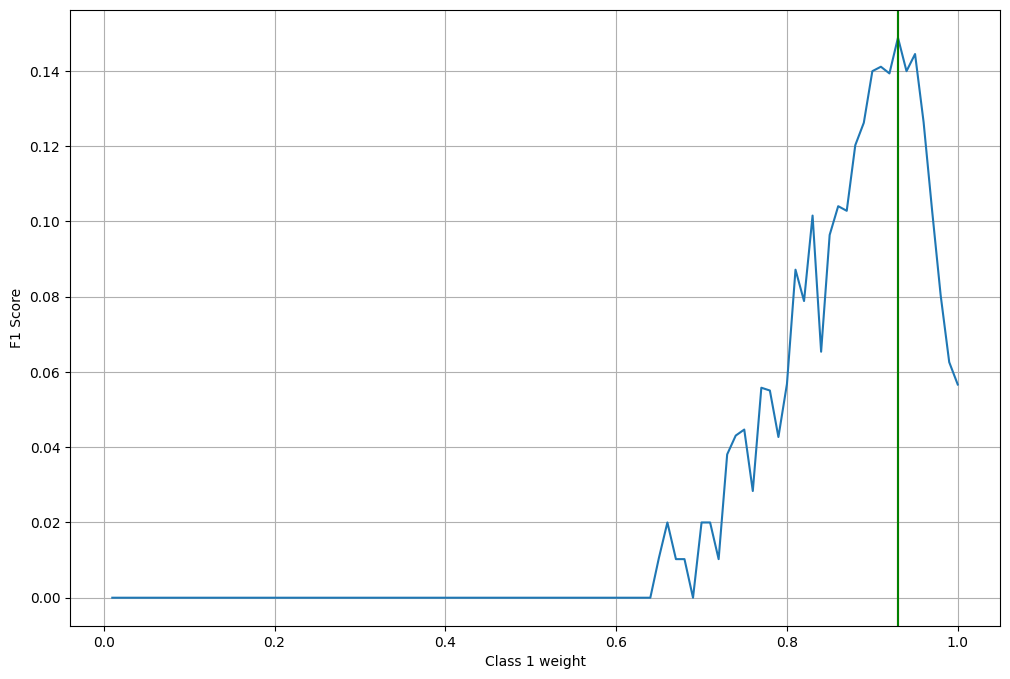

In [30]:
weight_1 = 1.0 - weights
f1 = model.cv_results_['mean_test_score']

print(model.best_params_)
plt.figure(figsize=(12, 8))
plt.plot(weight_1, f1)
plt.axvline(model.best_params_['class_weight'][1], color = 'r')
plt.axvline(0.93, color = 'g')
plt.ylabel('F1 Score')
plt.xlabel('Class 1 weight')
plt.grid()
plt.show()